$$ \Huge \text{Numpy Fractal Generator}$$

In [3]:
import numpy as np                          # for wicked fast arrays
from numba import njit                      # for compiling functions into C, so they run faster
import matplotlib.pyplot as plt             # plotting
from matplotlib import collections as mc    # plotting
import pylab as pl                          # plotting
import random                               # this is for random numbers

$\Large \text{Functions}$

In [4]:
@njit
def getPointsFromArraysinList(List):
    XPoints = np.array([1.1])
    YPoints = np.array([1.1])
    for l in List:
        XPoints = np.concatenate((XPoints, np.array([l[0][0]])))
        YPoints = np.concatenate((YPoints, np.array([l[1][0]])))
    return (XPoints[1:],YPoints[1:])

In [5]:
@njit
def Generate_Random_Points(n, Transformations):
    Output_Figures = [np.array([[1,0],[0,1],[1,1]], dtype=np.float64)]
    for i in np.arange(n+1):
        CurrentNumTrans = len(Output_Figures)
        Output_Figures = Output_Figures + [np.dot(Transformations[random.randint(0,len(Transformations)-1)],Output_Figures[CurrentNumTrans - 1])]
    return getPointsFromArraysinList(Output_Figures[1:])

In [6]:
@njit
def Transform(Figures, Transformations):
    New_Figures = [np.array([[1,0],[0,1],[1,1]], dtype=np.float64)]
    for M in Figures:
        for T in Transformations:
            New_Figures = New_Figures + [np.dot(T,M)]
    return New_Figures[1:]

@njit
def Generate_figures(n, figures, Transformations):
    Output_Figures = Transform(figures, Transformations)
    for i in np.arange(1,n):
        Output_Figures = Transform(Output_Figures, Transformations)
    return Output_Figures

In [7]:
def plot_figures(figures,size,width):
    lines = [ [(1.1, 1.1), (1.1, 1.1)] ]
    for M in figures:
        lines = lines + [[ (M[0][i], M[1][i]), (M[0][i+1], M[1][i+1]) ] for i in np.arange(len(np.transpose(M))-1)]
    lc = mc.LineCollection(lines[1:], linewidths=width)
    fig, ax = pl.subplots(figsize=(size,size))
    ax.add_collection(lc)
    ax.set_aspect('equal')
    ax.autoscale()

In [8]:
def plot_points(points,size,pointsize):
    fig, ax = plt.subplots(figsize=(size,size))
    ax.set_aspect('equal')
    ax.plot(*points, '.', ms=pointsize)

In [9]:
def plot(stuff,size,widthOrPointsize):
    if type(stuff) == list:
        plot_figures(stuff,size,widthOrPointsize)
    if type(stuff) == tuple:
        plot_points(stuff,size,widthOrPointsize)

$\Large \text{Transformations}$

In [10]:
def Scale(s):
    return np.array([[s, 0, 0],[0, s, 0],[0, 0, 1]])
def Translate(a, b):
    return np.array([[1, 0, a],[0, 1, b],[0, 0, 1]])
def Rotate(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0, 0, 1]])
def ShearX(t):
    return np.array([[1, t, 0],[0,1, 0],[0, 0, 1]])
def ShearY(t): 
    return np.array([[1, 0, 0],[t,1, 0],[0, 0, 1]])
def ScaleXY(s, t): 
    return np.array([[s, 0, 0],[0,t, 0],[0, 0, 1]])

$\Large \text{Playground}$

In [12]:
Box = np.transpose(np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1], [1/8, 1/8, 1], [1/8-1/16, 1/8+1/16, 1] ]))

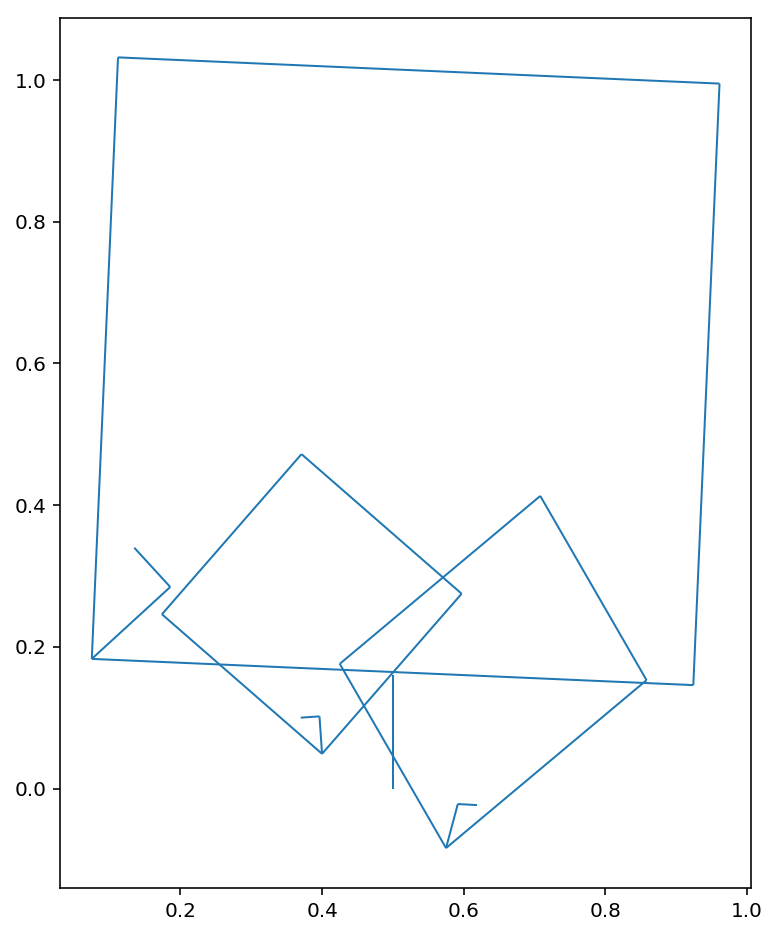

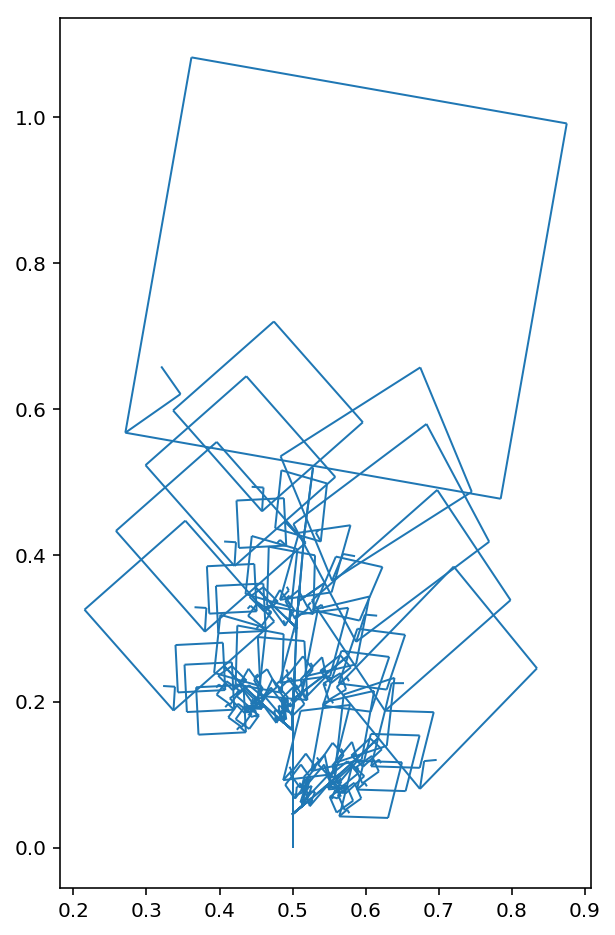

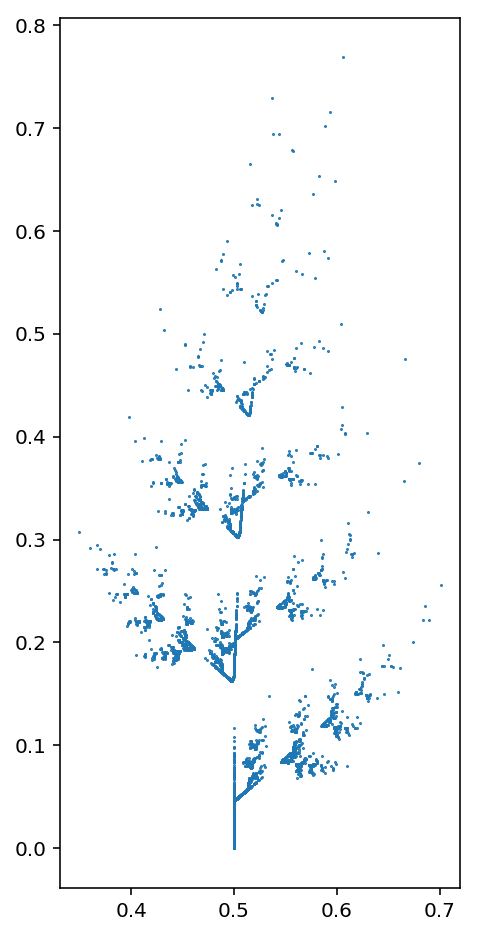

In [68]:
# Barnsley Fern

L_1 = np.array([[0.849,0.037,0.075],[-0.037, 0.849, 0.183],[0,0,1]])
L_2 = np.array([[0.197, -0.226, 0.4],[0.226, 0.197, 0.049],[0,0,1]])
L_3 = np.array([[-0.15,0.283,0.575],[0.26, 0.237, -0.084],[0,0,1]])
L_4 = np.array([[0,0,0.5],[0, 0.16, 0],[0,0,1]])

L = [L_1, L_2, L_3, L_4]

plot(Generate_figures(1, [Box], L),8,1)
plot(Generate_figures(4, [Box], L),8,1)
plot(Generate_Random_Points(10000, L),8,1)

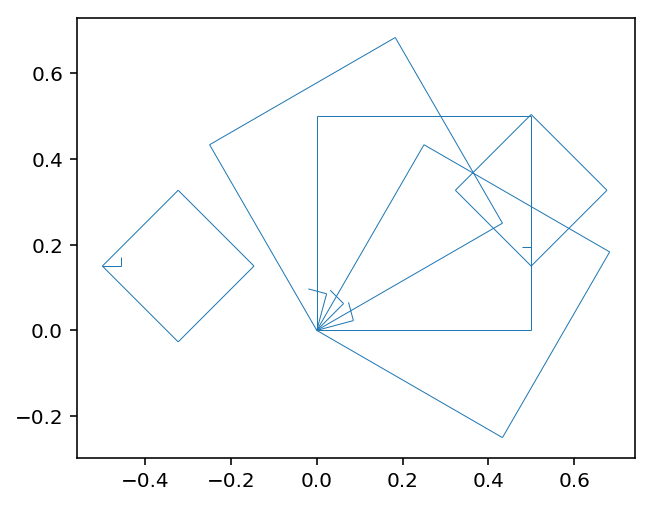

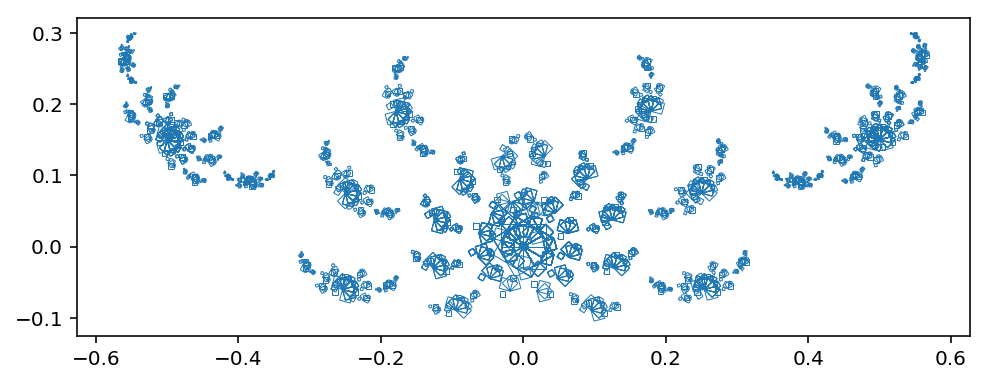

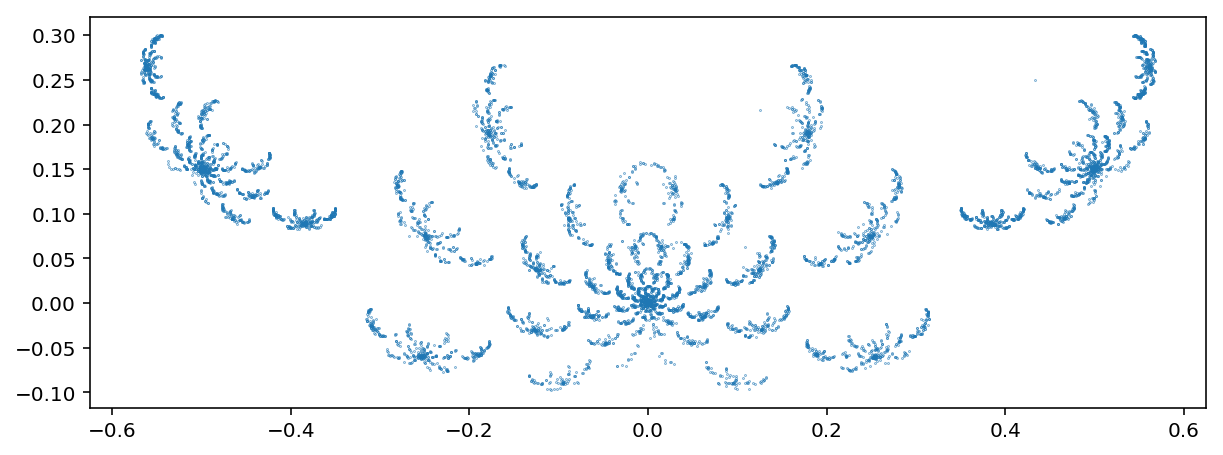

In [72]:
# Crab

Cr_1 = np.dot(np.dot(Translate(0.5,0.15),Rotate(math.pi/4)),Scale(1/4))
Cr_2 = Scale(1/2)
Cr_3 = np.dot(np.dot(Translate(-.5,0.15),Rotate(-math.pi/4)),Scale(1/4))
Cr_4 = np.dot(Rotate(-math.pi/6),Scale(1/2))
Cr_5 = np.dot(Rotate(math.pi/6),Scale(1/2))

Cr = [Cr_1, Cr_2, Cr_3, Cr_4, Cr_5]

plot(Generate_figures(1, [Box], Cr),5,.5)
plot(Generate_figures(5, [Box], Cr),8,.5)
plot(Generate_Random_Points(10000, Cr),10,.5)

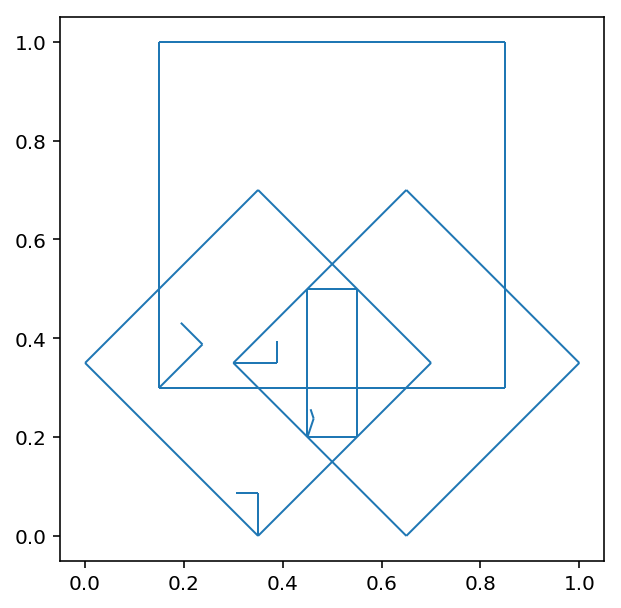

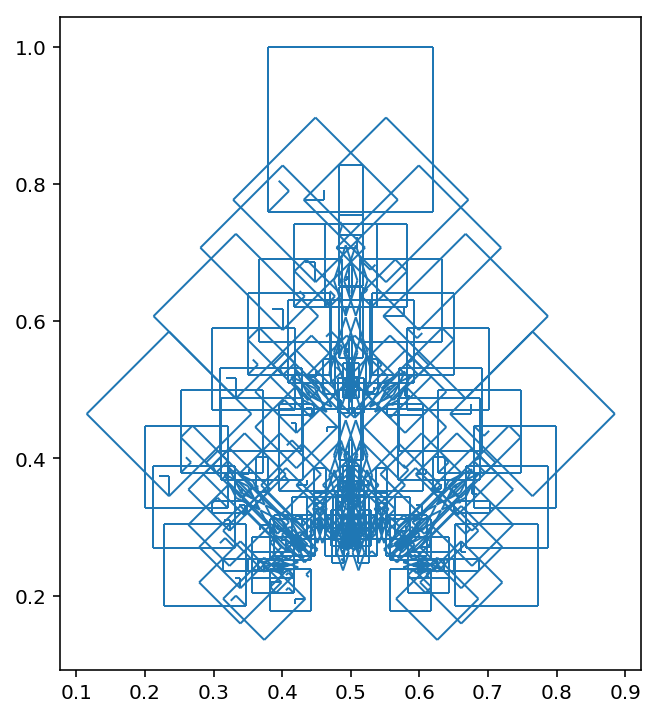

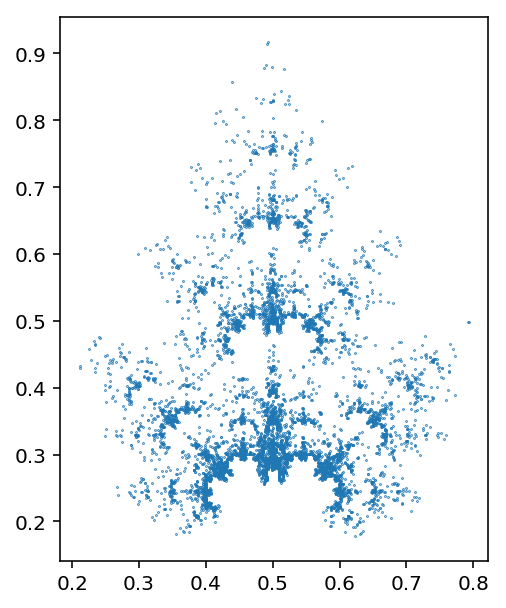

In [73]:
# Keir's Leaf

B1 = np.dot(Translate(0.15,0.3),Scale(0.7))
B2 = np.dot(Translate(0.35,0),np.dot(Rotate(math.pi/4),Scale(0.35*math.sqrt(2))))
B3 = np.dot(Translate(0.3,0.35),np.dot(Rotate(-math.pi/4),Scale(0.35*math.sqrt(2))))
B4 = np.dot(Translate(0.45,0.2),ScaleXY(1/10,3/10))
T_B = [B1, B2, B3, B4]

plot(Generate_figures(1, [Box], T_B),5,1)
plot(Generate_figures(4, [Box], T_B),6,1)
plot(Generate_Random_Points(10000, T_B),5,.7)

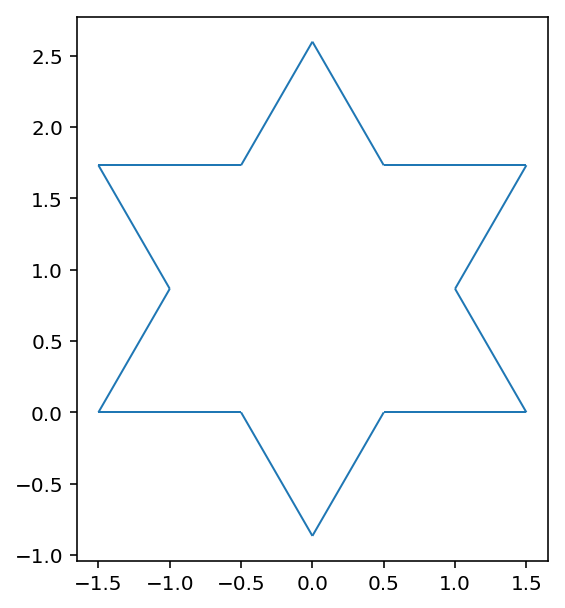

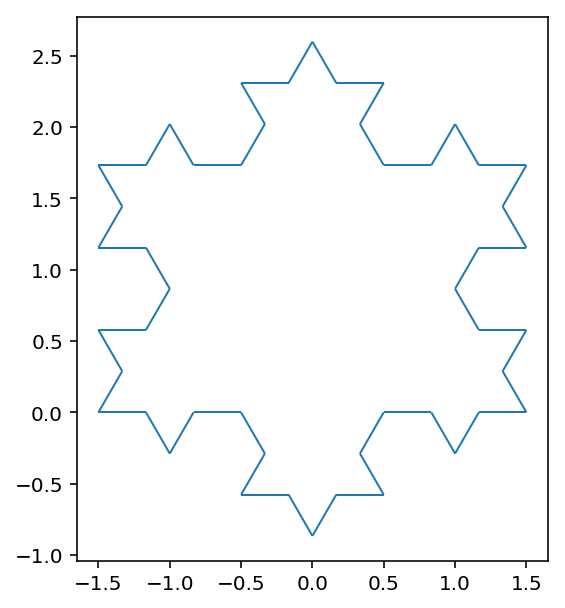

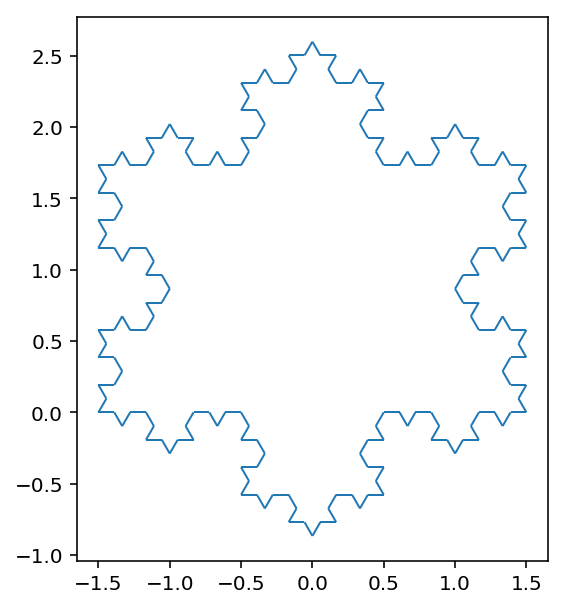

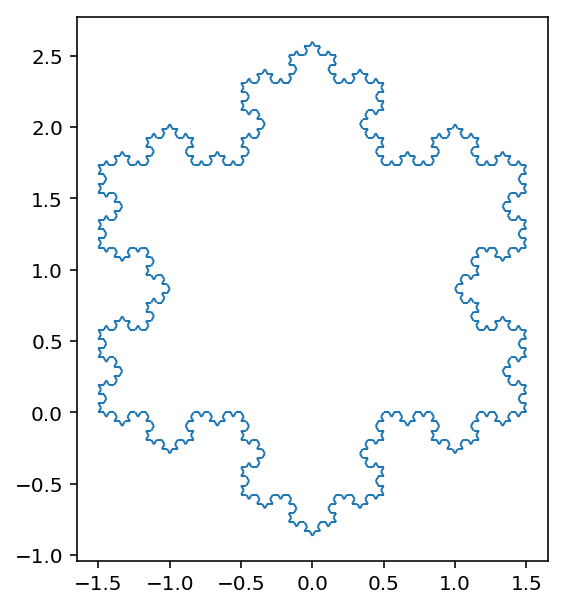

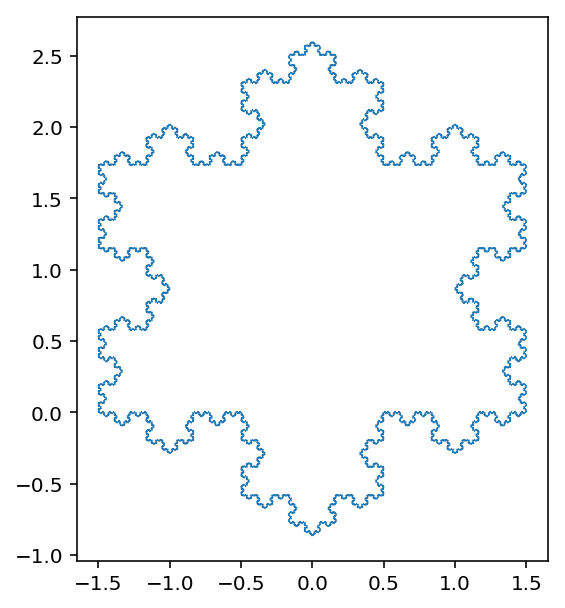

In [11]:
# Koch Snowflake

pi = np.pi
s=np.sin(pi/3)
c=np.cos(pi/3)

Line1 = np.array([ [0,1.5], [3*s,0], [1,1]])
Line2 = np.array([ [-1.5,0], [0,3*s], [1,1]])
Line3 = np.array([ [1.5,-1.5], [0,0], [1,1]])

L11 = np.dot(Translate(0,2*s),Scale(1/3))
L12 = np.dot(Translate(.5+s**2,2*s-c*s),np.dot(Rotate(pi/3),Scale(1/3)))
L13 = np.dot(Translate(1.5-s**2,2*s-c*s),np.dot(Rotate((-1*pi)/3),Scale(1/3)))
L14 = np.dot(Translate(1,0),Scale(1/3))
T1_L = [L11,L12,L13,L14]

L21 = np.dot(Translate(0,2*s),Scale(1/3))
L22 = np.dot(Translate(-s**2,2*s-c*s),np.dot(Rotate(pi/3),Scale(1/3)))
L23 = np.dot(Translate(-2+s**2,2*s-c*s),np.dot(Rotate((-1*pi)/3),Scale(1/3)))
L24 = np.dot(Translate(-1,0),Scale(1/3))
T2_L = [L21,L22,L23,L24]

L31 = np.dot(Translate(-1,0),Scale(1/3))
L32 = np.dot(Translate(-c/2,-s/2),np.dot(Rotate(-pi/3),Scale(1/3)))
L33 = np.dot(Translate(c/2,-s/2),np.dot(Rotate(pi/3),Scale(1/3)))
L34 = np.dot(Translate(1,0),Scale(1/3))
T3_L = [L31,L32,L33,L34]


i=1
plot(Generate_figures(i, [Line1], T1_L) + Generate_figures(i, [Line2], T2_L)+ Generate_figures(i, [Line3], T3_L) , 5, 1)

i=2
plot(Generate_figures(i, [Line1], T1_L) + Generate_figures(i, [Line2], T2_L)+ Generate_figures(i, [Line3], T3_L) , 5, 1)

i=3
plot(Generate_figures(i, [Line1], T1_L) + Generate_figures(i, [Line2], T2_L)+ Generate_figures(i, [Line3], T3_L) , 5, 1)

i=4
plot(Generate_figures(i, [Line1], T1_L) + Generate_figures(i, [Line2], T2_L)+ Generate_figures(i, [Line3], T3_L) , 5, 1)

i=5
plot(Generate_figures(i, [Line1], T1_L) + Generate_figures(i, [Line2], T2_L)+ Generate_figures(i, [Line3], T3_L) , 5, 1)
